## Zadania

### Regresja liniowa - Zadanie 1

Uwaga: treść zadania nawiązuje do analiz tworzonych podczas lekcji - potraktuj je jako ciąg dalszy tych analiz.


Zbuduj model używając tylko jednej zmiennej dla pozostałych atrybutów i wybierz ten, który uzyskuje najlepsze wyniki pomiaru jakości regresji. Następnie porównaj najlepiej działający model z regresją wyuczoną na wszystkich zmiennych objaśniających.

In [1]:
# Importuj biblioteki Pythona

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
# Dane:https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# "Ten baseline variables, age, sex, body mass index, average blood pressure, 
# and six blood serum measurements were obtained for each of n = 442 diabetes patients, 
# as well as the response of interest, a quantitative measure of disease progression one year after baseline."
# diabetes = datasets.load_diabetes()
# data = diabetes.data # nalezy je przekształcić do pandasowego dataframe'u

# Prześlij dane i utwórz pandy DataFrame
data = pd.read_csv('diabetes.csv')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
## Atrybuty (Zmienna objaśniana) + Zmienna modelowana (Zmienne objaśniające)
data.columns.tolist()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

#### Dokumentacja:

   Poniżej przedstawiono: wykres punktowy dla osi poziomej *wyodrębnione zmienne objaśniające* (dla poszczególnych zmiennych, osobny wykres) vs dla osi pionowej *target* ze zmiennym rozmiarem i/lub kolorem znacznika.
- Y - a quantitative measure of disease progression one year after baseline
- Y - ilościowa miara progresji choroby rok po punkcie początkowym

Wykres punktowy: Y(BP)

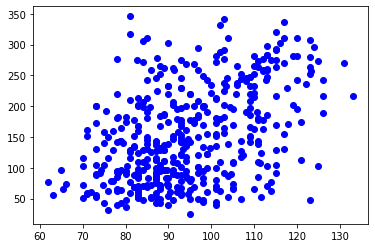

In [4]:
plt.scatter(data.BP, data.Y,  color='blue')

Wykres punktowy: Y(BMI)

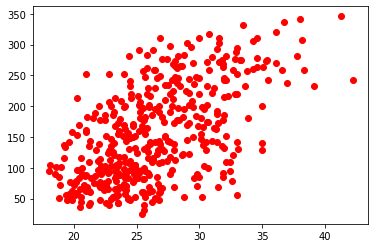

In [5]:
plt.scatter(data.BMI, data.Y,  color='red')

Wykres punktowy: Y(AGE)

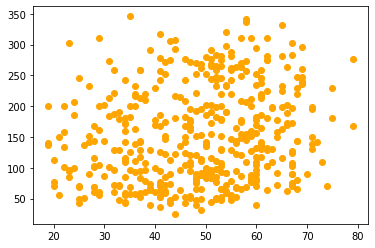

In [6]:
plt.scatter(data.AGE, data.Y, color='orange')

Wykres punktowy: Y(S5)

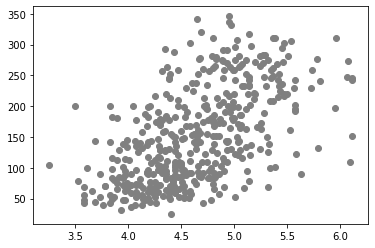

In [7]:
plt.scatter(data.S5, data.Y, color='gray')

Wykres punktowy: Y(SEX)

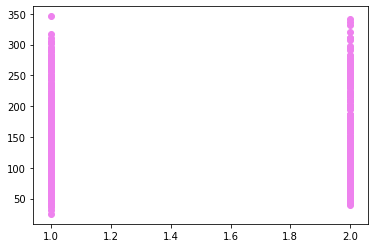

In [8]:
plt.scatter(data.SEX, data.Y, color='violet')

Wykres punktowy: Y(S1)

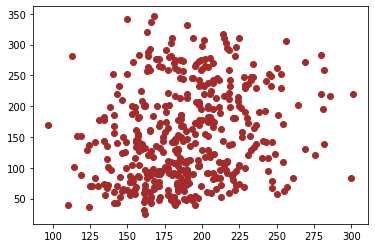

In [9]:
plt.scatter(data.S1, data.Y, color='brown')

Wykres punktowy: Y(S2)

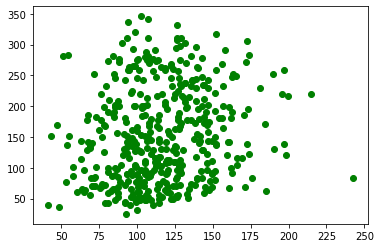

In [10]:
plt.scatter(data.S2, data.Y, color='green')

Wykres punktowy: Y(S6)

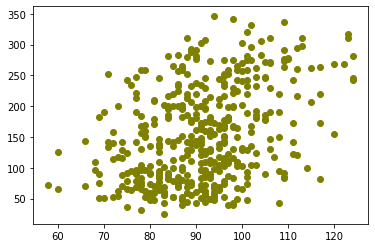

In [11]:
plt.scatter(data.S6, data.Y, color='olive')

Wykres punktowy: Y(S3)

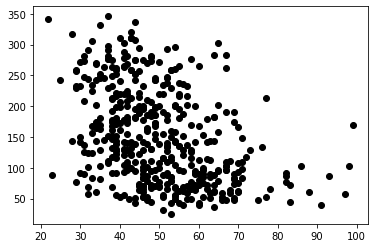

In [12]:
plt.scatter(data.S3, data.Y, color='black')

Wykres punktowy: Y(S4)

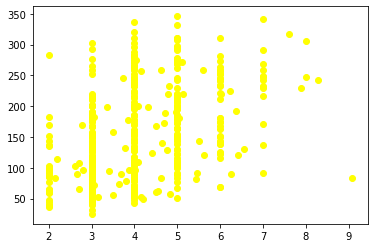

In [13]:
plt.scatter(data.S4, data.Y, color='yellow')

In [14]:
print('S5')
print(data.S5.corr(data.Y)) # pandas
print('BMI')
print(data.BMI.corr(data.Y)) # pandas
print('S4')
print(data.S4.corr(data.Y) )# pandas
print('BP')
print(data.BP.corr(data.Y)) # pandas
print('S2')
print(data.S2.corr(data.Y) )# pandas
print('S6')
print(data.S6.corr(data.Y)) # pandas
print('S3')
print(data.S3.corr(data.Y)) # pandas
print('AGE')
print(data.AGE.corr(data.Y)) # pandas
print('S1')
print(data.S1.corr(data.Y)) # pandas
print('SEX')
print(data.SEX.corr(data.Y)) # pandas

S5
0.565882592442744
BMI
0.5864501344746887
S4
0.43045288474477267
BP
0.4414817585625712
S2
0.17405358696874254
S6
0.382483484248581
S3
-0.39478925067091863
AGE
0.18788875071891972
S1
0.21202248101455065
SEX
0.04306199845160534


In [15]:
# print('S5')
# print(data.S5.corr(data.Y)) # pandas
# print('BMI')
# print(data.BMI.corr(data.Y)) # pandas
print('S4')
print(data.S4.corr(data.Y) )# pandas
print('BP')
print(data.BP.corr(data.Y)) # pandas
print('S2')
print(data.S2.corr(data.Y) )# pandas
print('S6')
print(data.S6.corr(data.Y)) # pandas
print('S3')
print(data.S3.corr(data.Y)) # pandas
print('AGE')
print(data.AGE.corr(data.Y)) # pandas
print('S1')
print(data.S1.corr(data.Y)) # pandas
print('SEX')
print(data.SEX.corr(data.Y)) # pandas

S4
0.43045288474477267
BP
0.4414817585625712
S2
0.17405358696874254
S6
0.382483484248581
S3
-0.39478925067091863
AGE
0.18788875071891972
S1
0.21202248101455065
SEX
0.04306199845160534


#### Dokumentacja:

Dla pozostałych atrybutów, wybrano ten, który uzyskał najlepsze wyniki pomiaru jakości regresji. Na podstawie obliczenia korelacji z „innymi” szeregami, z wyłączeniem braków danych. Wybrano atrybut: "BP".

In [16]:
corr = data.corr()
# corr

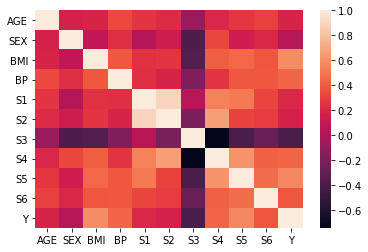

In [17]:
import seaborn as sns
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

#### Dokumentacja:
Poniżej przedstawiono sposób wykrywania brakujących wartości.
Zwraca prawd lub fałsz o tym samym rozmiarze wskazujący, czy wartości to NA. Wartości NA, takie jak None lub :attr: numpy.NaN, są mapowane na wartości True. Wszystko inne jest mapowane na wartości False.

#### Nie wykryto brakujących wartości!

In [18]:
data.isnull().values.any()

False

Zmienna objaśniająca – zmienna w modelu statystycznym, na podstawie której wylicza się zmienną objaśnianą. Zmiennych objaśniających zwykle występuje wiele w jednym modelu. U nas to są: ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

Zależne (inne nazwy: objaśniane, target) – są to zmienne określające własność obiektu, o której chcemy wnioskować. Czyli: ['Y']

Model predykcyjny opisuje zależności między zmiennymi objaśniającymi a targetem. Pozwala on w oparciu o zmienne objaśniające domniemać jaka jest wartość target.

In [19]:
dataset = data.iloc[:,:-1] # wyodrebniamy zmienne objaśniające bez targetu
dataset

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


Podział tablicy lub macierzy na losowe podzbiory treningów i testów

In [20]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BP']], data.Y, test_size=0.7, random_state=0)

#### Współczynnik R-kwadrat
Współczynnik R-kwadrat jest miarą jakości dopasowania modelu. Mówi on o tym, jaki procent jednej zmiennej wyjaśnia zmienność drugiej zmiennej. Przyjmuje on wartości od 0 do 1.

In [21]:
# 1. Tworzymy obiekt modelu
model = LinearRegression()
# 2. Trenujemy model na danych treningowych
model.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model.score(X_test, y_test)

0.17165634082461081

#### Prosta regresja liniowa
Zaczniemy od najbardziej znanej regresji liniowej, prostoliniowego dopasowania do danych. Prosty krój to model formy:
- y = ax + b
gdzie 'a' jest powszechnie znane jako nachylenie, a 'b' jest powszechnie znane jako punkt przecięcia.

Zatem:
- Nachylenie modelu, wyznaczamy na podstawie: model.coef_
- Przecięcie modelu, wyznaczamy na podstawie: model.intercept_

W naszym przypadku:
- Nachylenie modelu: 2.7755137
- Przechwycenie modelu: -114.42573768460622

In [22]:
model.coef_ # Podejrzyjmy współczynniki modelu, nachylenie modelu

array([2.7755137])

In [23]:
model.intercept_ # Punkt przecięcia prostej z osią Y

-114.42573768460622

Przewiduj za pomocą modelu liniowego.

In [24]:
predykcje = model.predict(X_test)

In [25]:
# predykcje

#### Błąd średniokwadratowy:
Błąd średniokwadratowy to różnica między wartościami szacowanymi a wynikami. Przewidywana wartość opiera się na pewnym równaniu i mówi, czego oczekujesz jako średnia, ale uzyskany wynik może różnić się od tej przewidywanej, co jest niewielkim błędem od szacowanej wartości. Ta różnica nazywa się MSE. To określa, jak dobre jest oszacowanie na podstawie twojego równania.

In [26]:
# Mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

Mean squared error: 4655.78


Poniższy wykres rozrzutu danych dotyczących średniego ciśnienia krwi i ilościowej miary progresji choroby rok po punkcie początkowum u pacjentów z cukrzycą wraz z dopasowaną prostą regresji y=2.7755137x-114.42573768460622.

Gdzie:
- y - ilościowej miary progresji choroby rok po punkcie początkowum
- x - średnie ciśnienie krwi

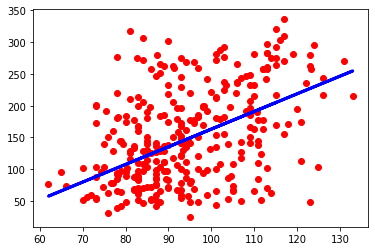

In [27]:
# Poniżej wykres punktowy *y* vs *x* ze zmiennym rozmiarem i/lub kolorem znacznika.
plt.scatter(X_test, y_test, color='red') 
# Wykres liniowy y od x.
plt.plot(X_test, predykcje, color='blue', linewidth=3)
plt.show()

Podział tablicy lub macierzy na losowe podzbiory treningów i testów wszystkich zmiennych objaśniających.

In [28]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[
    ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']], data.Y, test_size=0.2, random_state=0)

In [29]:
# 1. Tworzymy obiekt modelu
model1 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model1.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model1.score(X_test, y_test)

0.33223321731061806

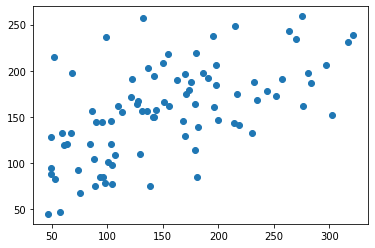

In [30]:
predykcje = model1.predict(X_test)
plt.scatter(y_test, predykcje)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, data.Y, test_size=0.5, random_state=0)

In [32]:
# 1. Tworzymy obiekt modelu
model2 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model2.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model2.score(X_test, y_test)

0.43774971182540967

Tworzenie listy z współczynnika modelu odpowiadającego za nachylenie modelu
[-0.07412108291445282, -25.34464211440403, 6.085875191467618, 1.1208623743115846, -0.952381186056526, 0.6193406573356073, 0.08650594731191841, 4.293962891990378, 76.93077629943933, 0.05268164074391465]

Tworzenie etykiet z zmiennych objaśniających
['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

Przypisanie DataFrame (struktura danych która zawiera oznakowane osie (wiersze i kolumny)) do nowej zmiennej w tym przypadku 'features'
Empty DataFrame
Columns: []
Index: []

Wypełnienie DataFrame wartościami z listy o nazwie labels zawierających etykiety z zmiennych objaśniających
  Features
0      AGE
1      SEX
2      BMI
3       BP
4       S1
5       S2
6       S3
7       S4
8       S5
9       S6

Wypełnienie DataFrae wartościami z listy o nazwie coeff zawierającej współczynniki modelu odpowiadających za nachylenie modelu w wartościach dziesiętnych
  Features  importance
0      AGE   -0.074121
1     

Text(0.5, 0, 'Importance - Współczynniki modelu odpowiadających za nachylenie modelu')

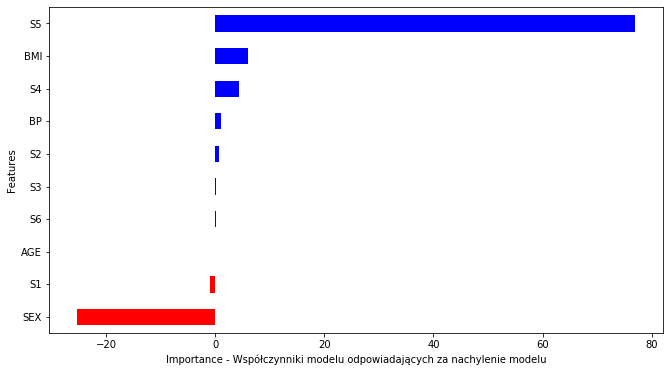

In [34]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
print("Tworzenie listy z współczynnika modelu odpowiadającego za nachylenie modelu")
coeff = list(model2.coef_)
print(coeff)
print()
print("Tworzenie etykiet z zmiennych objaśniających")
labels = list(X_train.columns)
print(labels)
print()
print("Przypisanie DataFrame (struktura danych która zawiera oznakowane osie (wiersze i kolumny)) do nowej zmiennej w tym przypadku 'features'")
features = pd.DataFrame()
print(features)
print()
print("Wypełnienie DataFrame wartościami z listy o nazwie labels zawierających etykiety z zmiennych objaśniających")
features['Features'] = labels
print(features)
print()
print("Wypełnienie DataFrae wartościami z listy o nazwie coeff zawierającej współczynniki modelu odpowiadających za nachylenie modelu w wartościach dziesiętnych")
features['importance'] = coeff
print(features)
print()
print("Sortowanie rosnąco współczynnika modelu odpowiadającego za nachylenie modelu do osi OX")
features.sort_values(by=['importance'], ascending=True, inplace=True)
print(features)
print()
print("Zwracamy wartość True lub False w zależności czy współczynnik modelu odpowiadający za nachylenie modelu do osi OX jest większy od 0, to wtedy zwracamy wartość True w innym przypadku zwracamy wartość False")
features['positive'] = features['importance'] > 0
print(features['positive'])
print()
# Ustaw indeks DataFrame na labels, które zawierają ektykiety z zmiennych objaśniających
features.set_index('Features', inplace=True)
print("Ndarray jednowymiarowy z etykietami osi dla osi OY labels, dla osi OX coeff. Rodzaj wykresu: poziomy wykres słupkowy. Mapujący w zależności od zwracanej wartości boolen przez features.positive w tym przypadku. Jeśli zwracana wartość jest True to kolor niebieski, jeśli False to kolor czerwony")
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance - Współczynniki modelu odpowiadających za nachylenie modelu')

#### Wnioski z powyższego wykresu:

porównaj najlepiej działający model z regresją wyuczoną na wszystkich zmiennych objaśniających.

Na podstawie powyższego wykresu, możemy określić dla jakich zmiennych objaśniających regresja liniowa będzie rosnąca, a dla jakich malejąca. Jeśli chodz o porównanie najlepiej działającego modelu z regresją wyuczoną na wszystkich zmiennych objaśniających. Można dojść do wniosku, że najlepiej działający model w tym przypadku BP, który uzyskuje najlepsze wyniki pomiaru jakości regresji. Współczynnik modelu odpowiadającego za nachylenie modelu nie ma wpływu na najlepszy wynik pomiaru jakości regresji. Powyższa analiza pozwala nam określić wielkość współczynnika modelu odpowiadającego za nachylenie modelu w stosunku do innych zmiennych objaśniających.